# July 10 - AE vs VAE and no DN dataset

In [2]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

np.set_printoptions(threshold=np.inf)

def plot_event(dump_dir, iteration, mode):
    
    if mode is "validation":
        np_arr_path = dump_dir + "val_iteration_" + str(iteration) + ".npz"
    else:
        np_arr_path = dump_dir + "iteration_" + str(iteration) + ".npz"
    
    # Load the numpy array
    np_arr = np.load(np_arr_path)
    np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["prediction"], np_arr["labels"], np_arr["energies"]

    i = random.randint(0, np_labels.shape[0]-1)
    plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                    label_dict[np_labels[i]], np_energies[i].item(),
                                    show_plot=True)

    plot_utils.plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                                np_recon, 50000, num_bins=200)
    
def plot_training(run_id, model_name, iteration, variant):

    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

    # Setup the path to the training log file
    training_log = dump_dir + "log_train.csv"

    if variant is "AE":
        plot_utils.plot_ae_training([training_log], [model_name], {model_name:["red"]},
                                 downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))
    elif variant is "VAE":
        plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))
        
    plot_event(dump_dir, iteration, mode="training")

## Test 1 : Train an AE on the no dark noise dataset and visualize the results

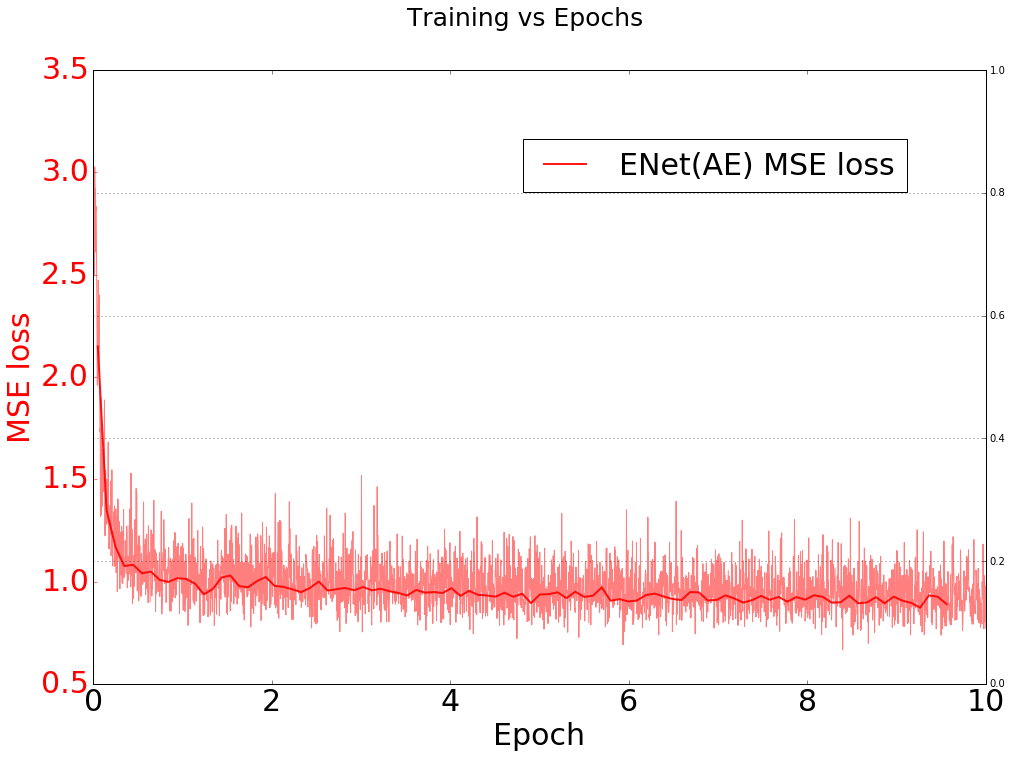

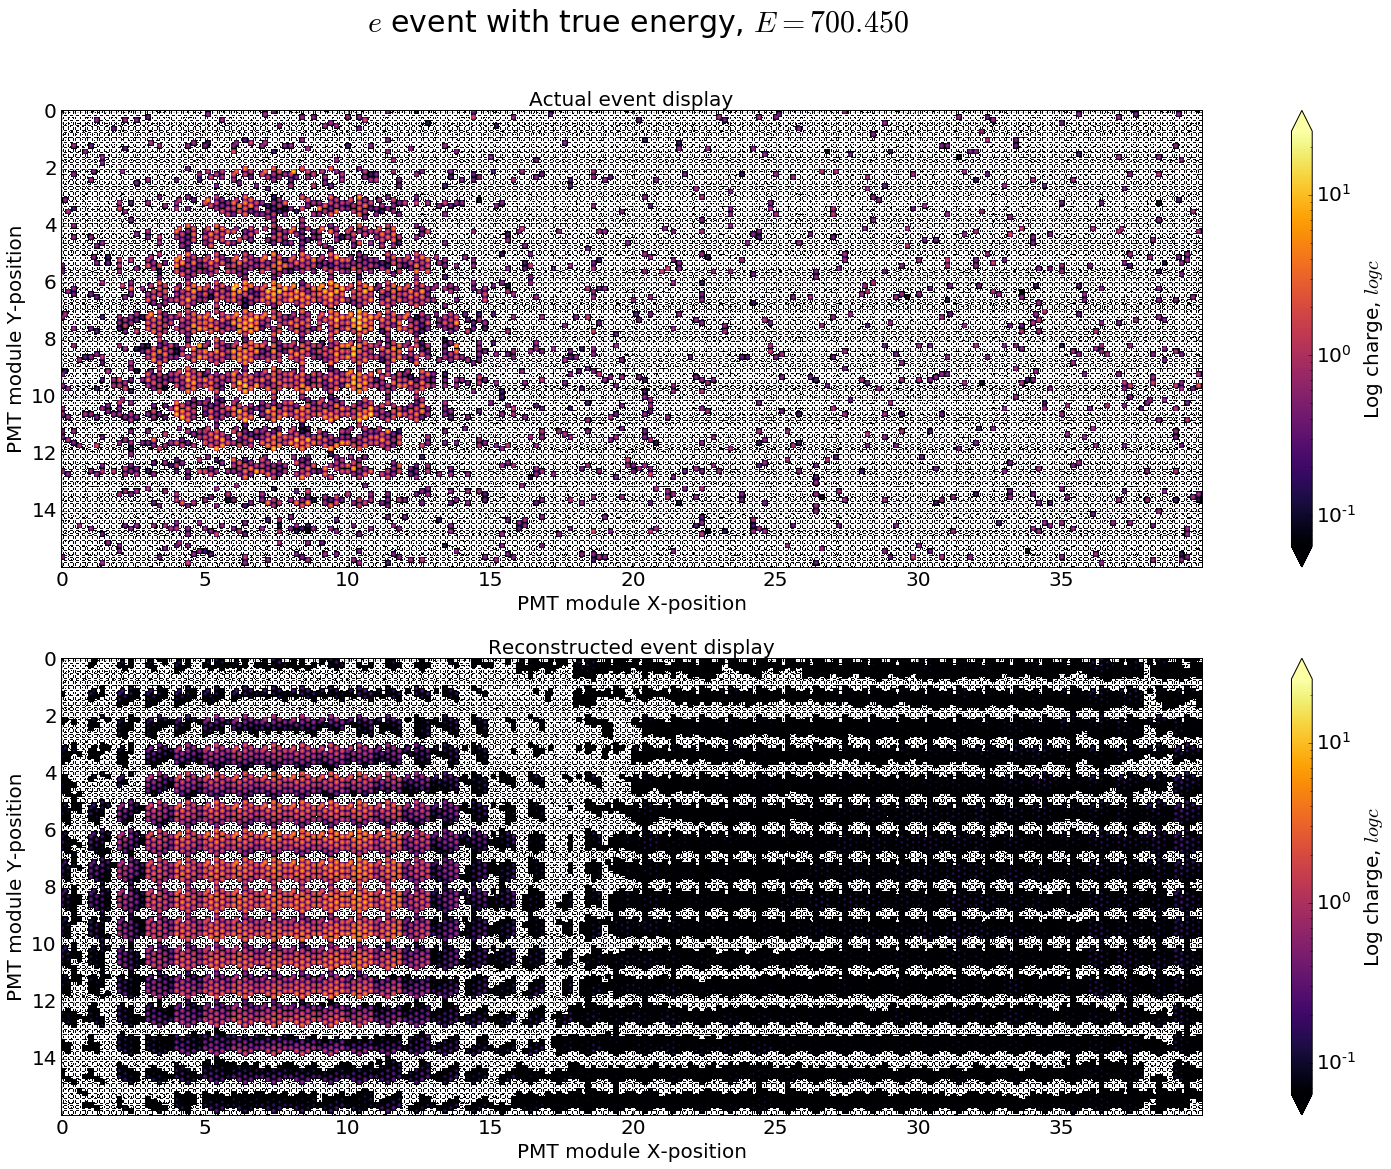

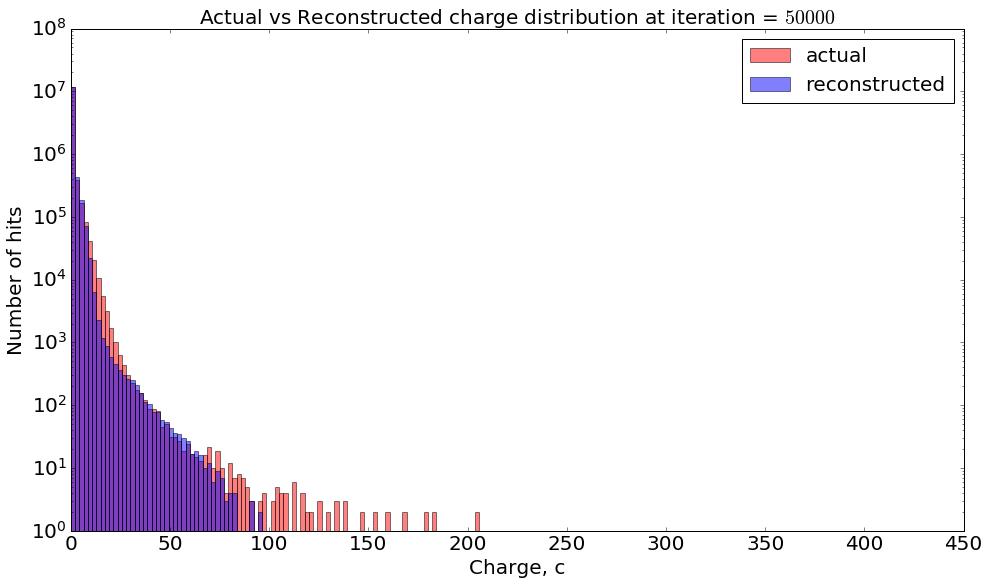

In [5]:
plot_training("20190710_171527", "ENet(AE)", 2999, "AE")

## The above results are flawed since the network weights were initialized using an already trained AE, need to do this test again

## Test 2 : Add a different VAE bottleneck ( with an extra linear layer )

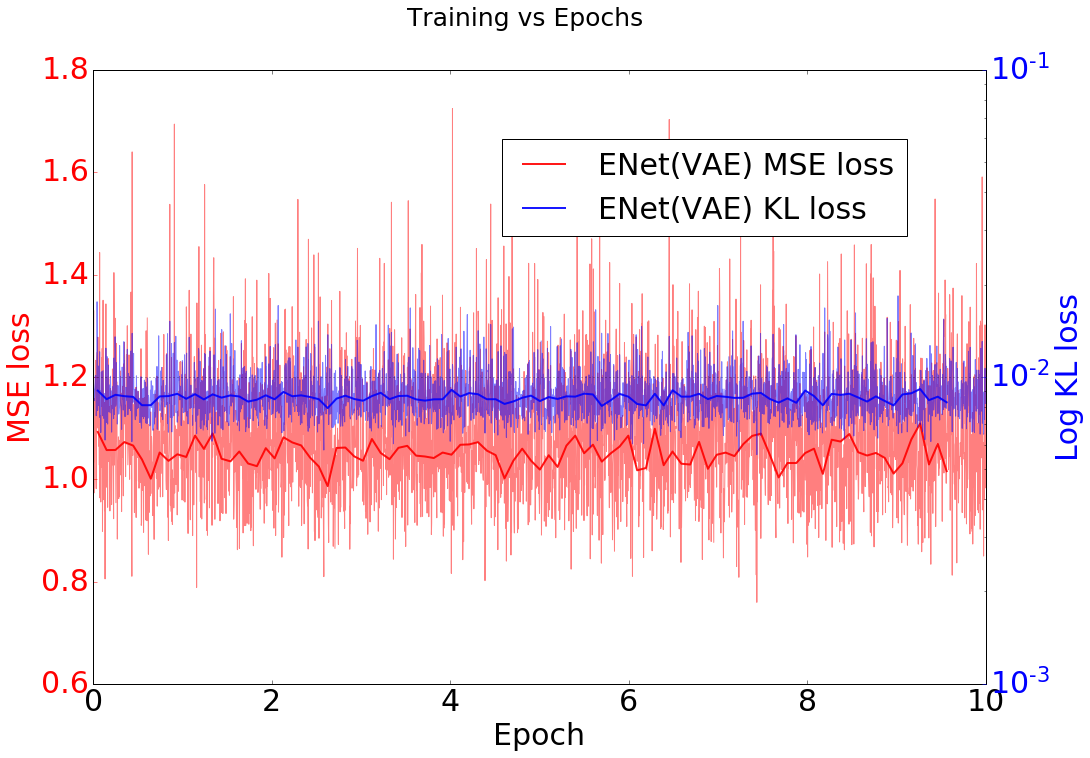

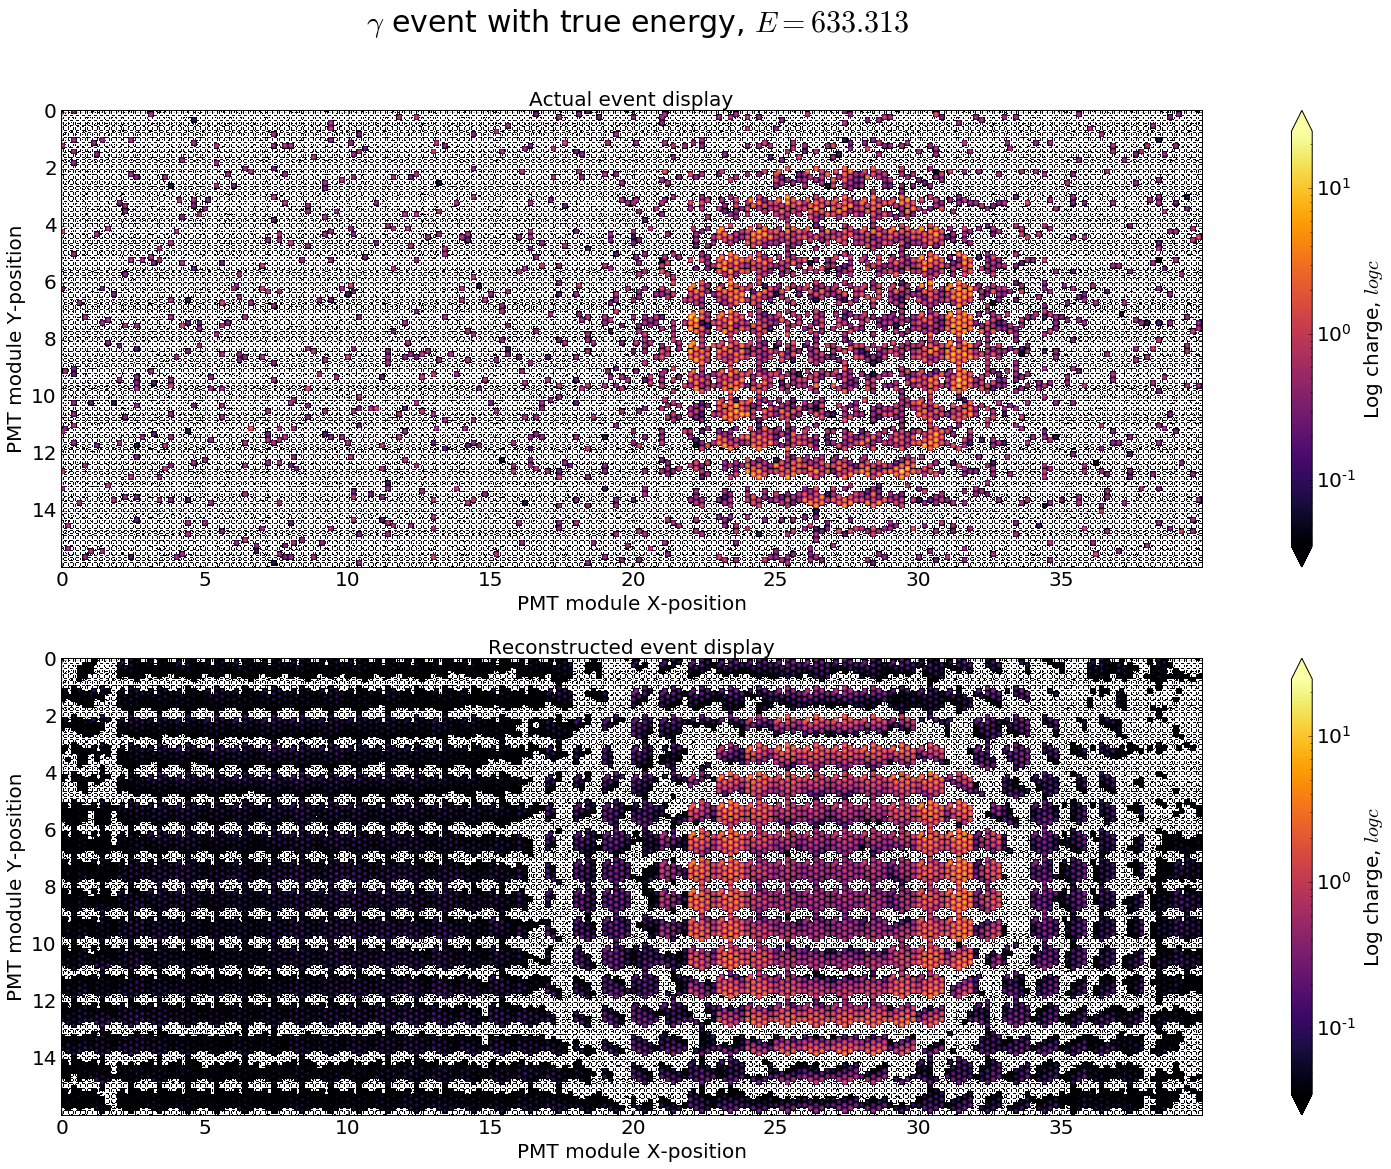

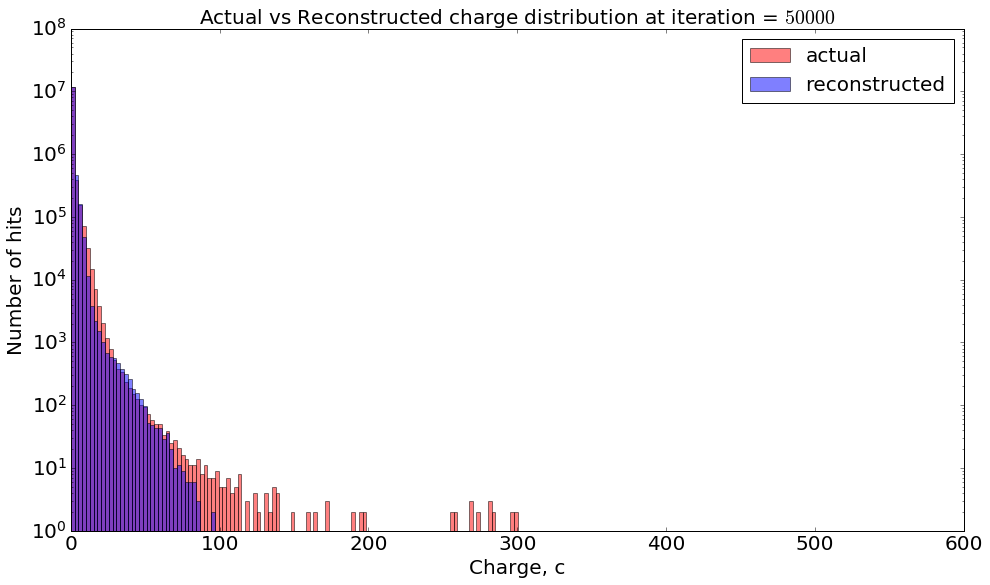

In [6]:
plot_training("20190710_173447", "ENet(VAE)", 2999, "VAE")

## Second attempt at the sampling from training above

In [7]:
np_samples = np.load("/home/akajal/WatChMaL/VAE/dumps/20190710_174942/samples/ENet_0/100_samples.npy")

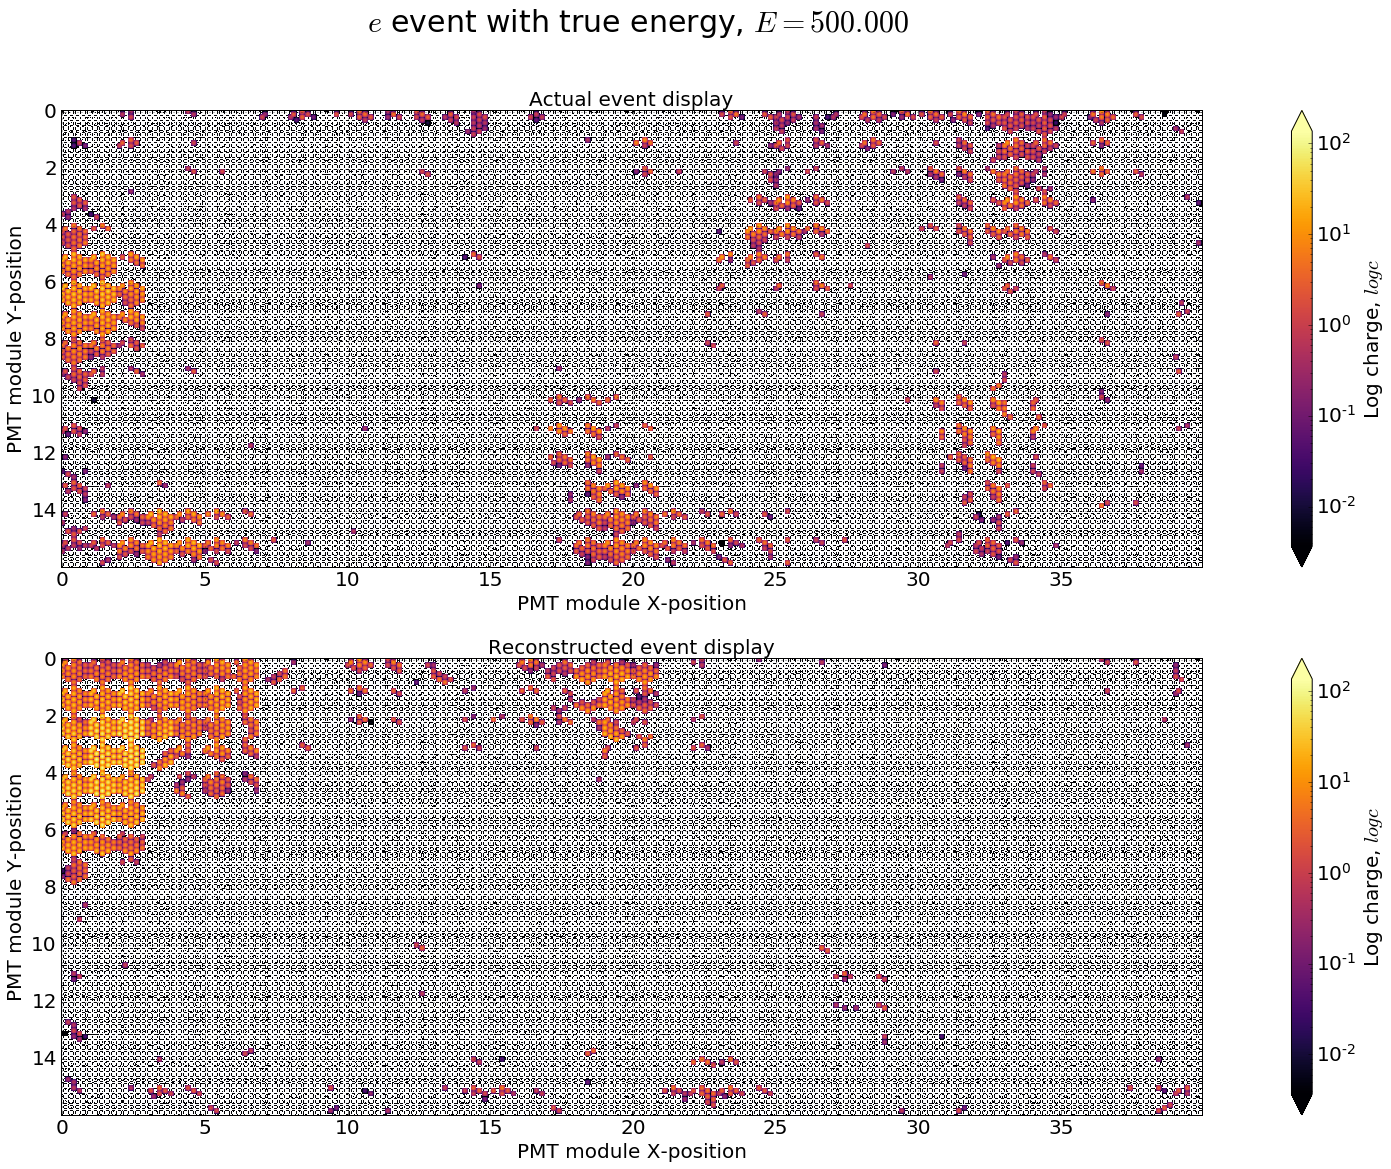

In [12]:
i = random.randint(0, np_samples.shape[0]-2)
plot_utils.plot_actual_vs_recon(np_samples[i], np_samples[i+1], 
                                    "e", 500,
                                    show_plot=True)

## No luck. Test 3 : VAE bottleneck but load only the AE weights ( not the VAE as test 2 )

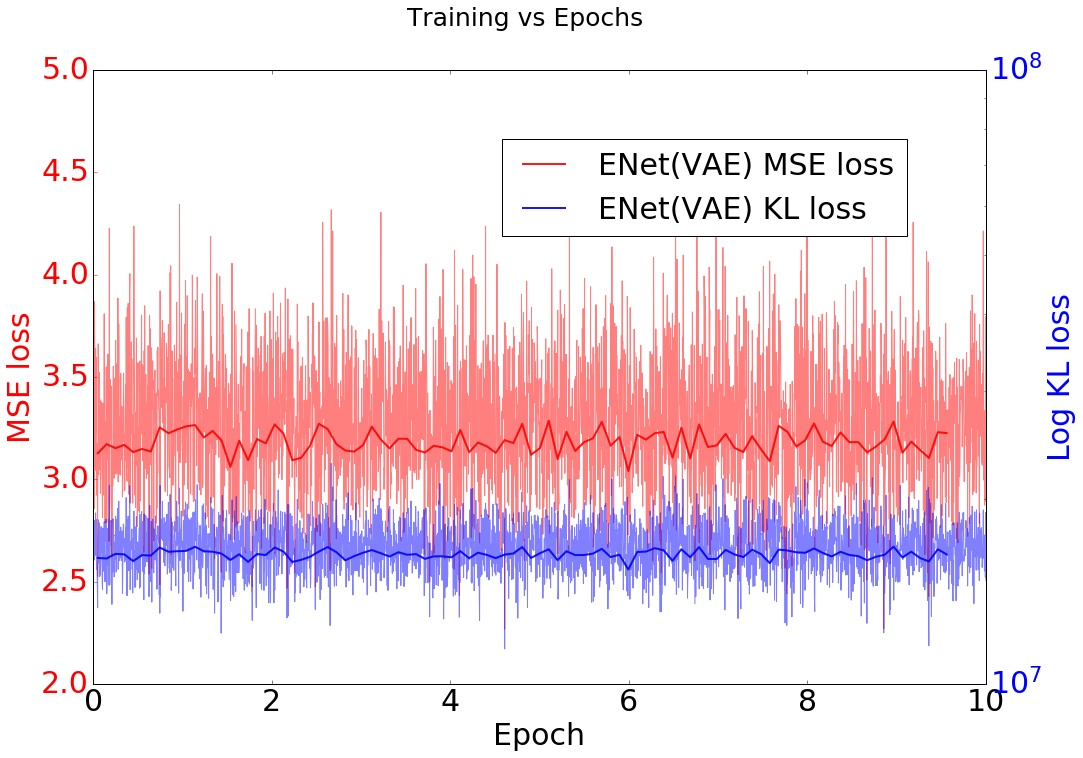

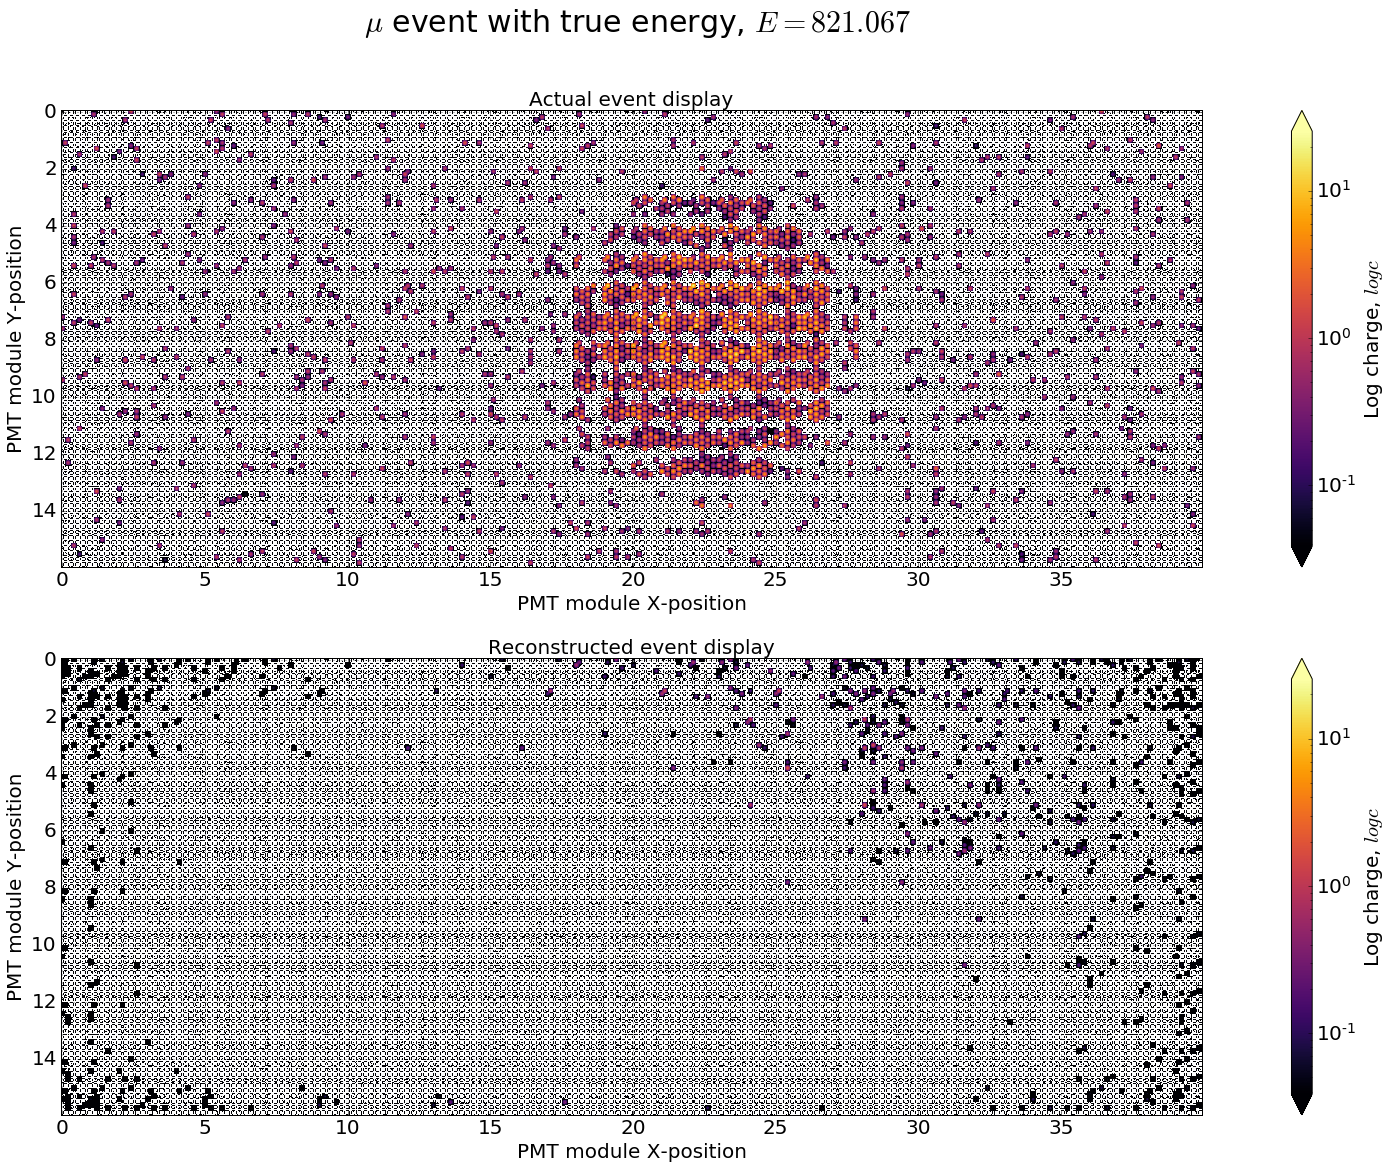

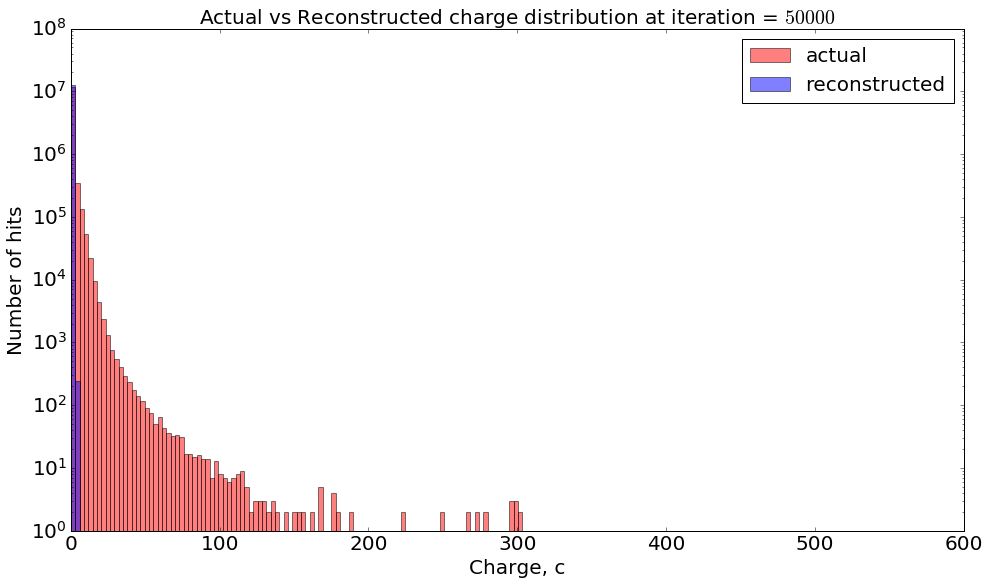

In [15]:
plot_training("20190710_174521", "ENet(VAE)", 2999, "VAE")

## After refreshing

## VAE with the new bottleneck but no AE weights loaded

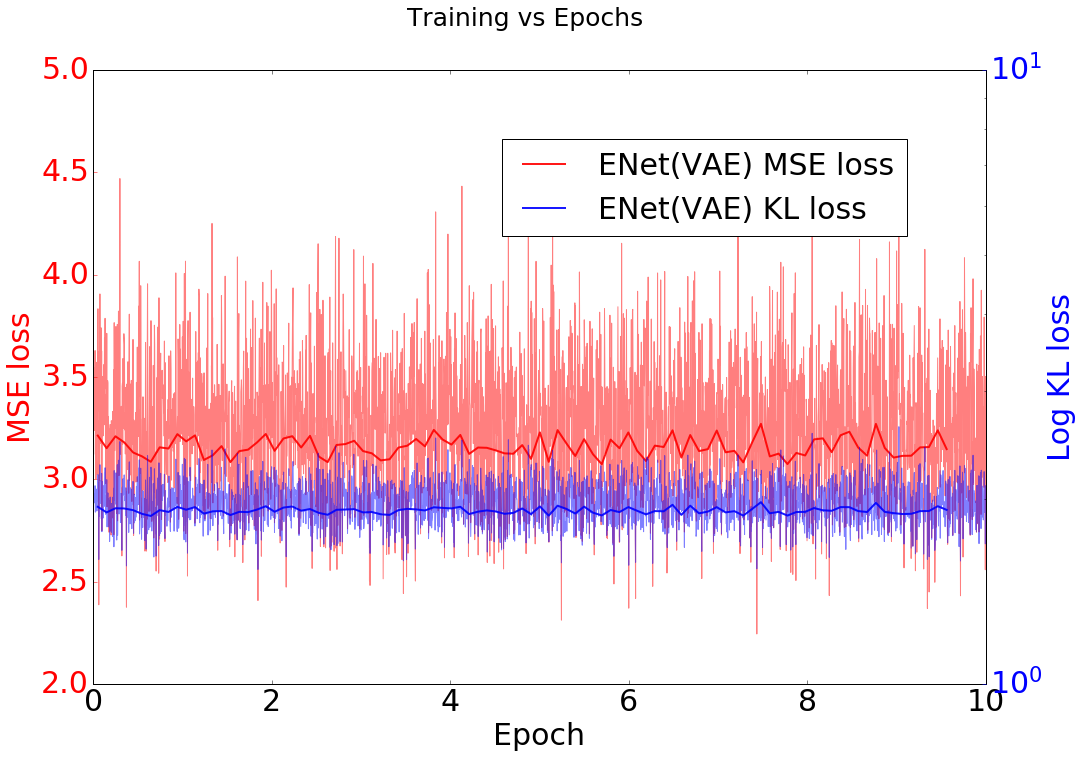

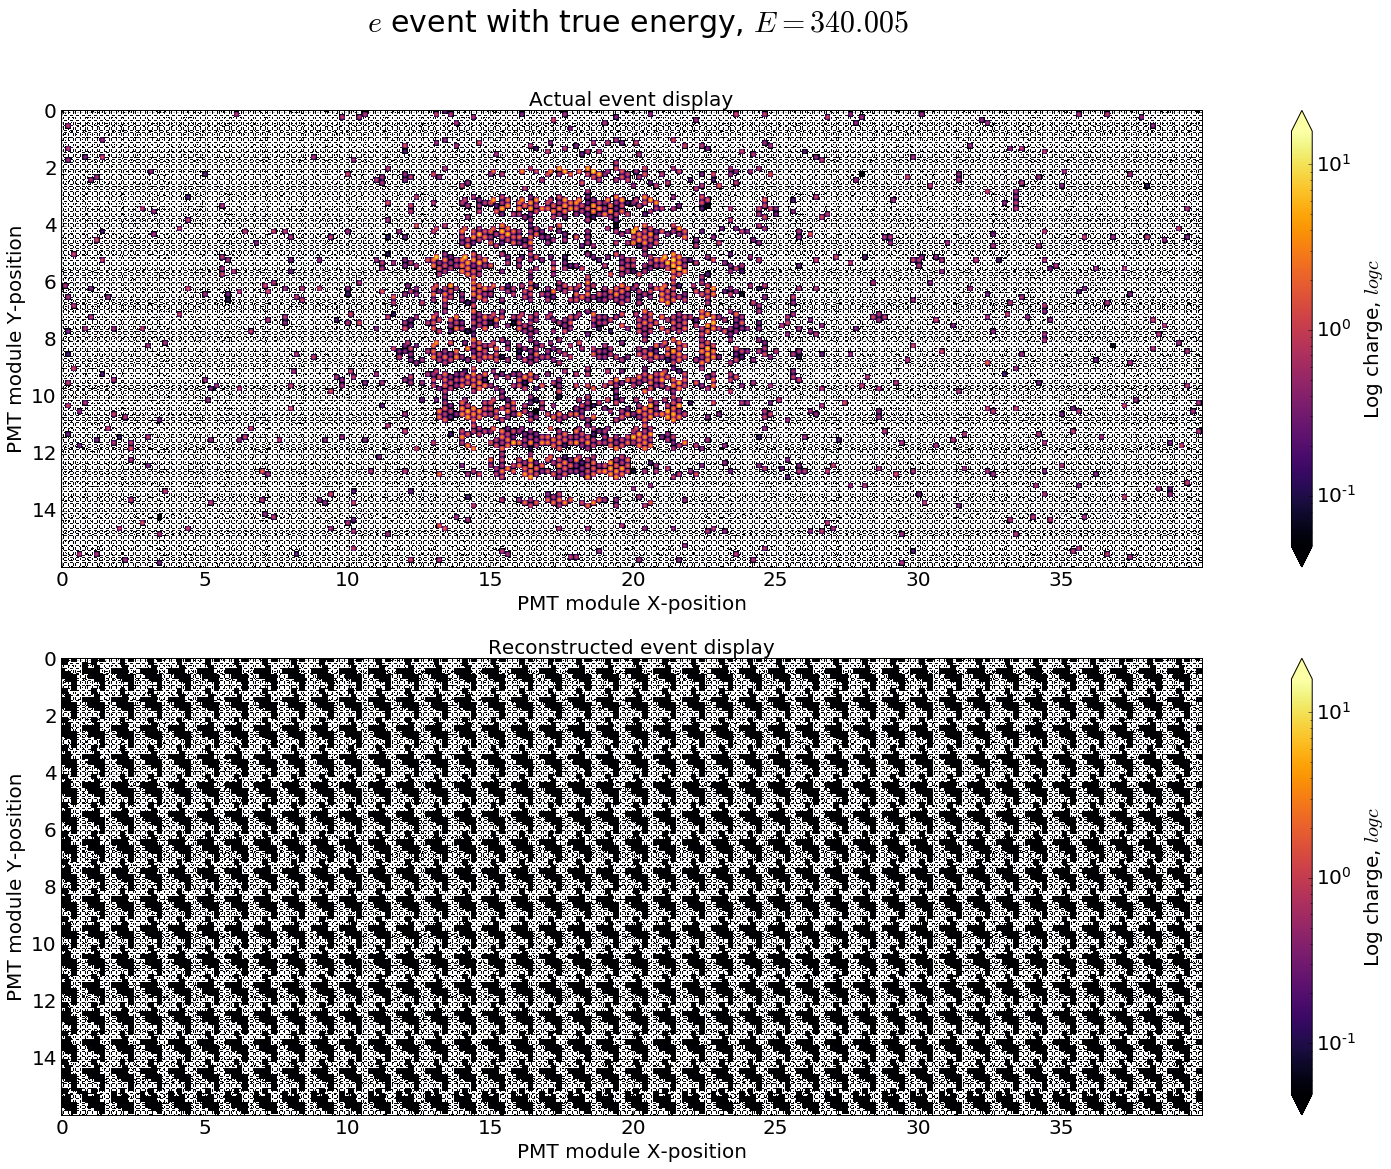

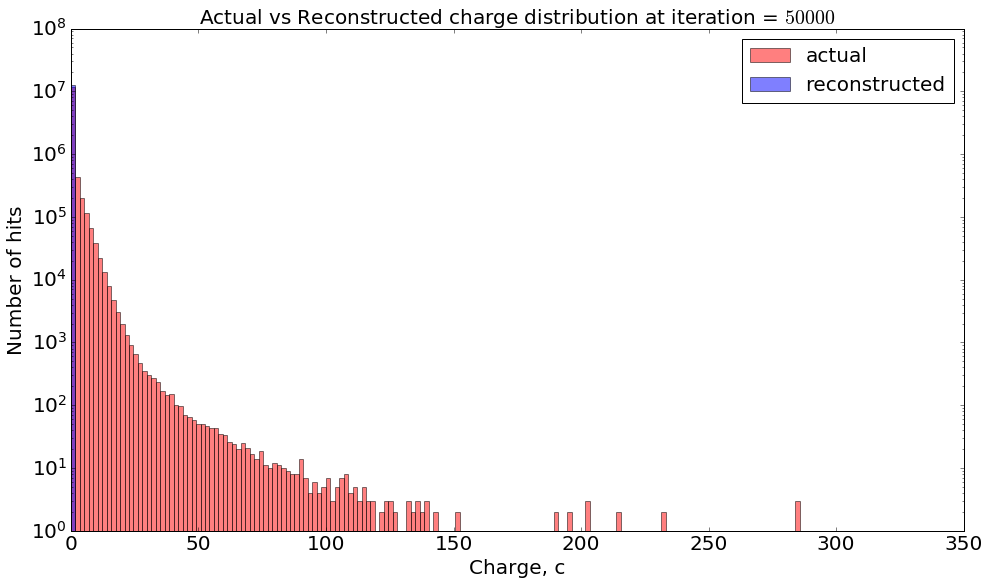

In [16]:
plot_training("20190710_182246", "ENet(VAE)", 2999, "VAE")

## Newly trained AE to generate another set of weights 

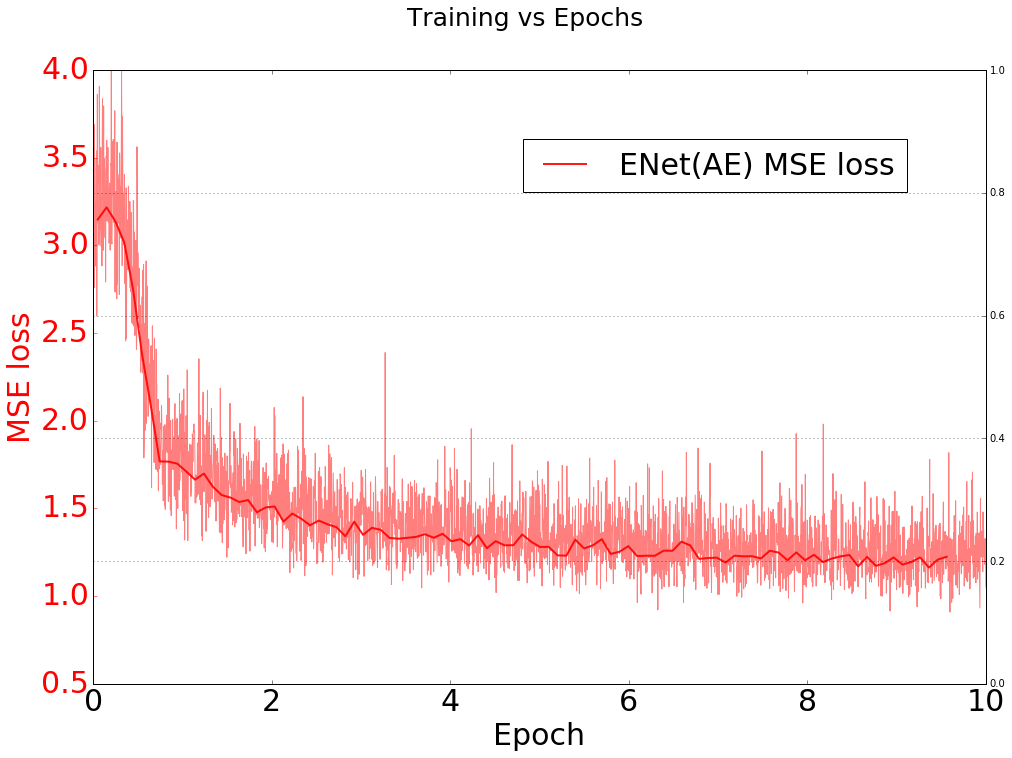

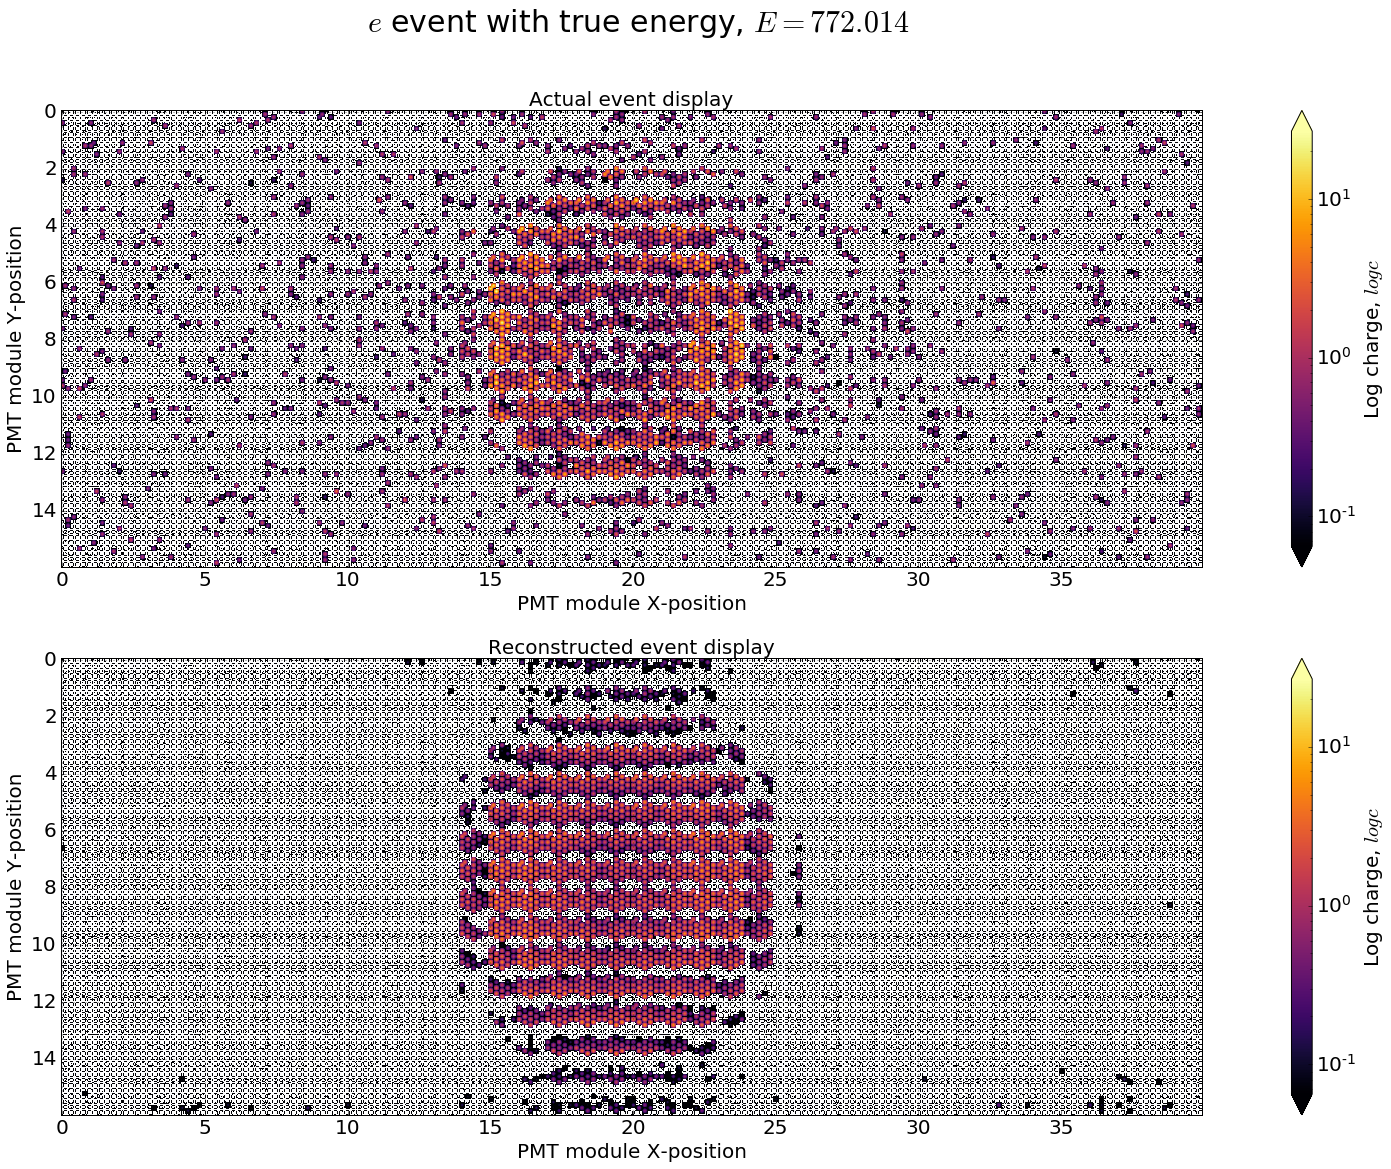

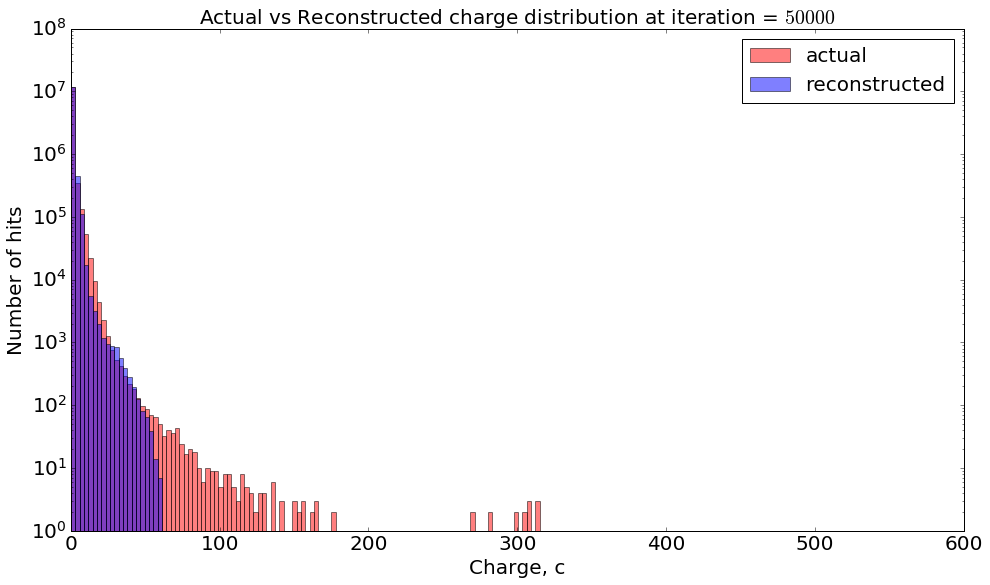

In [17]:
plot_training("20190710_182445", "ENet(AE)", 2999, "AE")

## VAE with AE weights but only training the bottleneck

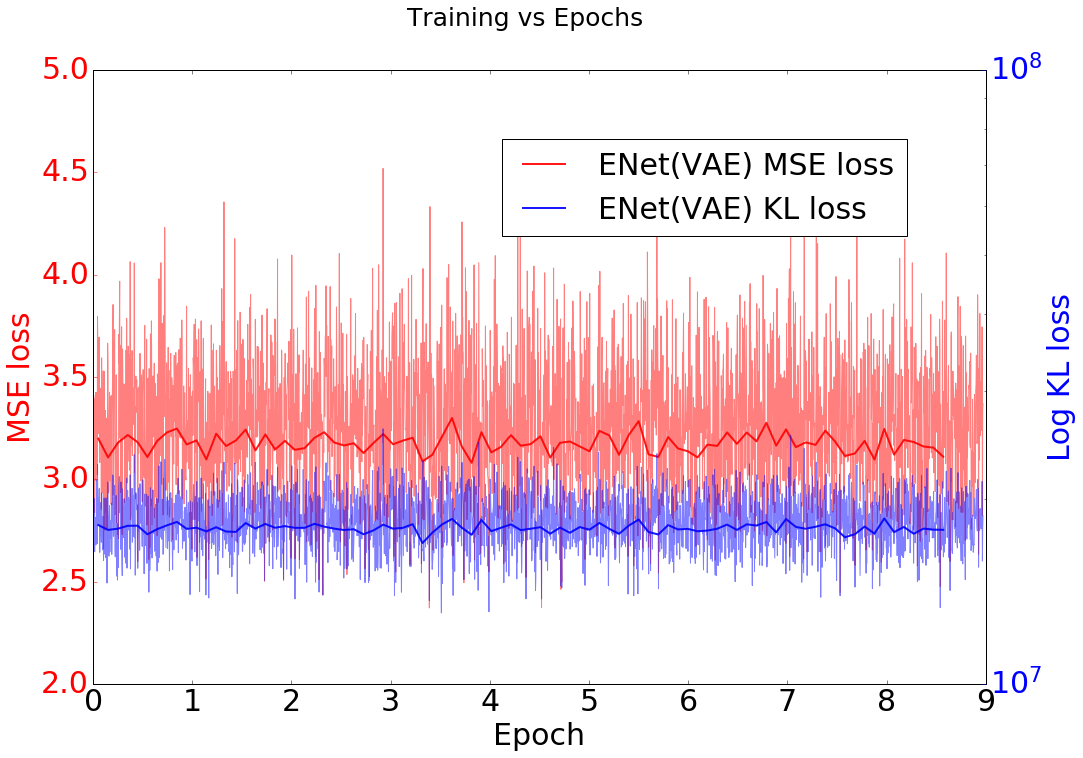

FileNotFoundError: [Errno 2] No such file or directory: '/home/akajal/WatChMaL/VAE/dumps/20190710_183506/iteration_2999.npz'

In [21]:
plot_training("20190710_183506", "ENet(VAE)", 2999, "VAE")

## VAE with AE weights and train the whole network

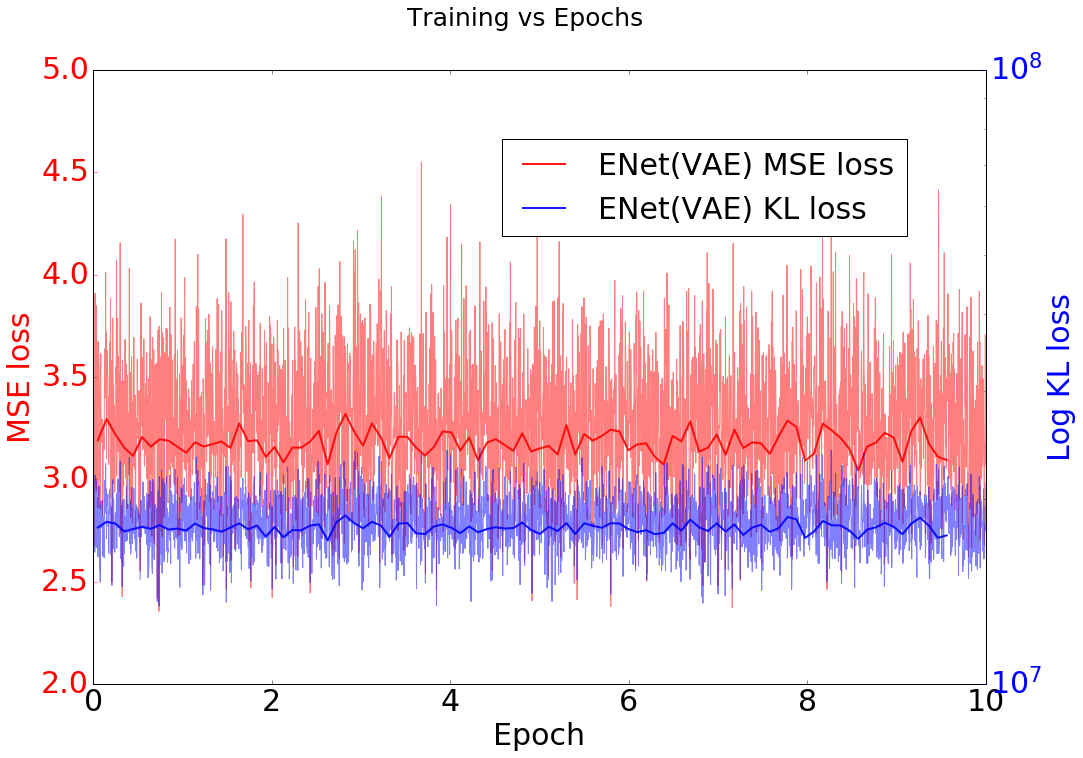

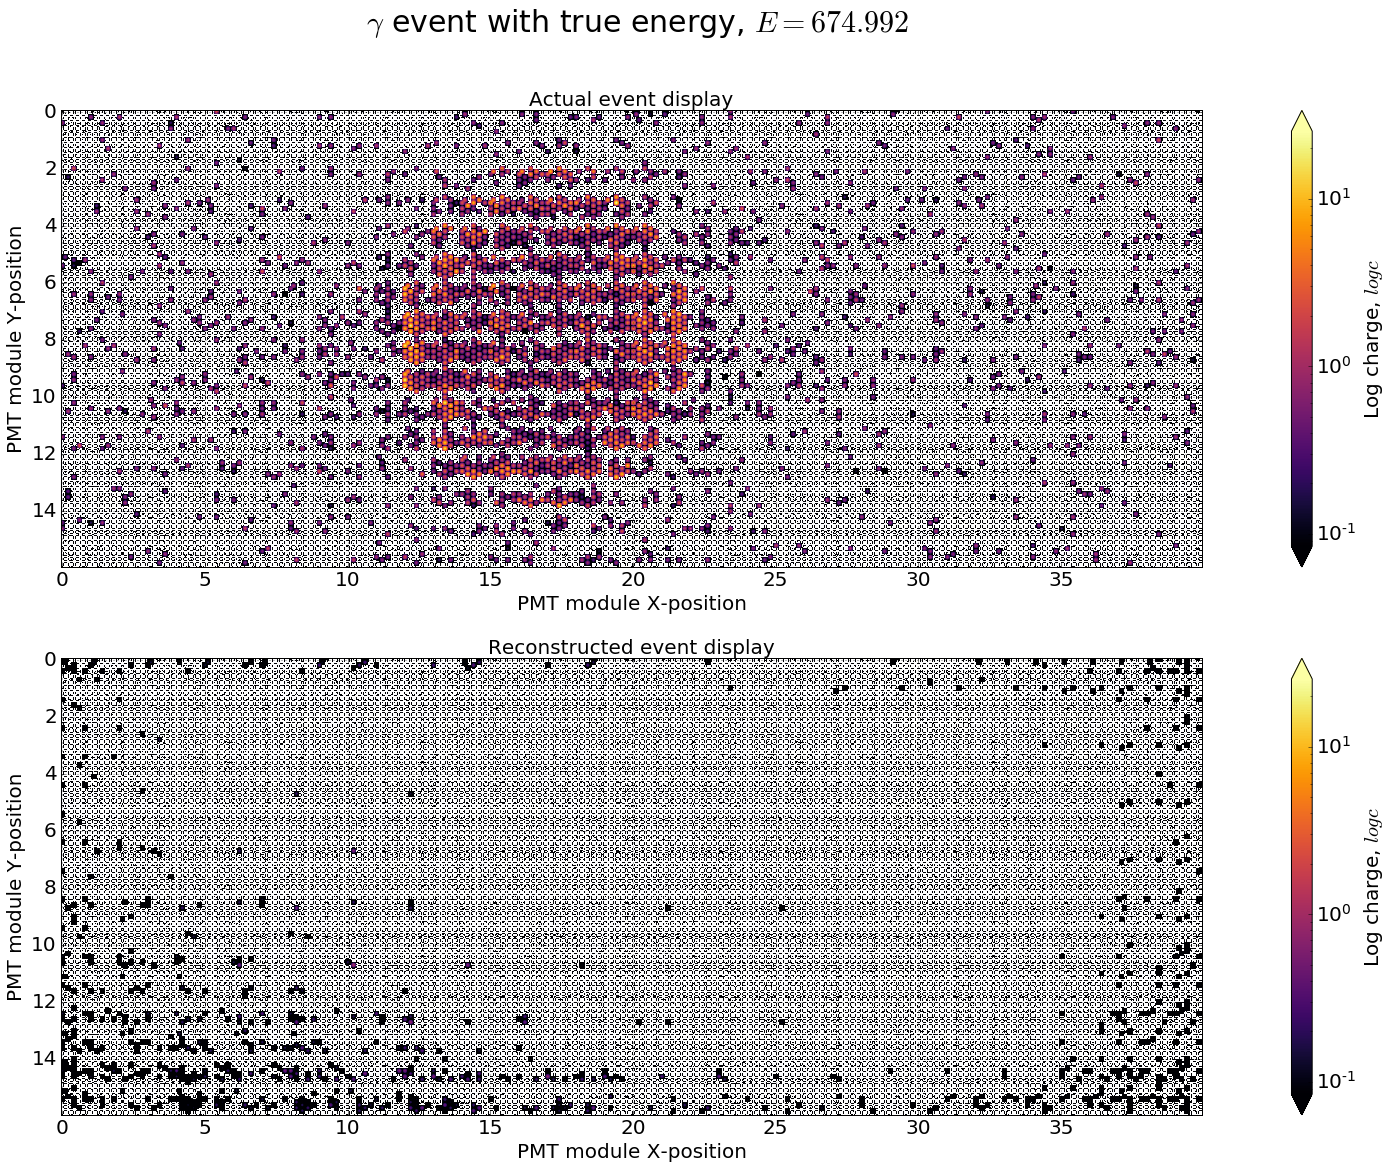

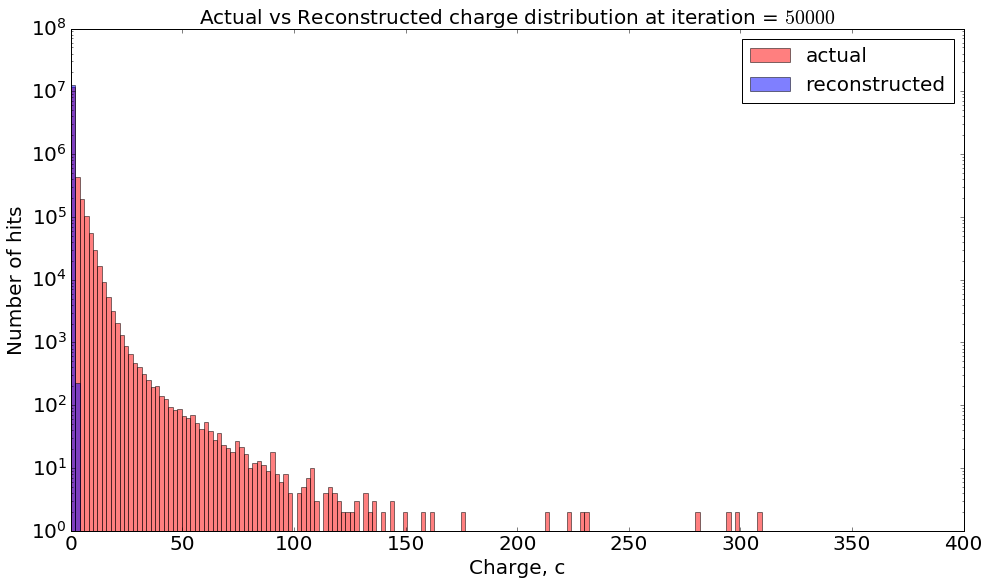

In [22]:
plot_training("20190710_183608", "ENet(VAE)", 2999, "VAE")